In [1]:
import numpy as np
import scipy 
from nimfa.methods import factorization
import nimfa

In [2]:
V = scipy.linalg.hilbert(60) + np.random.rand(60, 60) / 50
fctr = nimfa.Nmf(V, seed="nndsvd", rank=40, max_iter=12, update='euclidean',
                objective='fro')

In [3]:
fctr.factorize()

<nimfa.models.mf_fit.Mf_fit instance at 0x7fdf44354248>

In [4]:
W = fctr.basis()
print W

[[  5.26907654e-01   8.98385999e-01   7.03915814e-02 ...,   2.22044605e-16
    2.22044605e-16   2.22044605e-16]
 [  4.90497793e-01   3.61570261e-01   2.22044605e-16 ...,   4.58156359e-03
    2.22044605e-16   5.66613524e-04]
 [  4.50294248e-01   1.74784924e-01   2.22044605e-16 ...,   2.22044605e-16
    3.20422222e-03   1.05409245e-02]
 ..., 
 [  6.02747343e-02   2.40449731e-16   9.40605130e-02 ...,   1.26440754e-02
    1.99111244e-03   3.47054617e-03]
 [  5.80293869e-02   2.22044605e-16   2.02815051e-02 ...,   3.25789362e-16
    3.88560985e-02   3.43690416e-02]
 [  6.18932802e-02   2.22044605e-16   2.81061751e-02 ...,   1.90103550e-02
    2.22044605e-16   1.76059496e-02]]


In [5]:
H = fctr.coef()
print H

[[  4.58730662e-01   4.22753641e-01   3.89823501e-01 ...,   5.23187228e-02
    4.96591721e-02   4.64712589e-02]
 [  8.35865081e-01   3.32777571e-01   1.51151512e-01 ...,   2.22044605e-16
    2.22044605e-16   2.22044605e-16]
 [  4.75608732e-02   2.22044605e-16   2.22044605e-16 ...,   8.60749001e-02
    7.01540103e-02   4.35174827e-02]
 ..., 
 [  1.58431896e-04   7.94685129e-04   2.22044605e-16 ...,   3.59396572e-16
    1.71313717e-02   2.22285945e-16]
 [  1.21250078e-04   2.22044605e-16   2.22044605e-16 ...,   6.72770284e-02
    5.16006905e-02   2.51100224e-02]
 [  2.22044605e-16   2.22044605e-16   1.12378713e-02 ...,   3.43328720e-16
    4.42661503e-16   5.12340062e-16]]


In [6]:
np.linalg.norm((V-W.dot(H)) / np.linalg.norm(V, ord='fro'), ord='fro')

0.086740303096893581

In [7]:
import sys
import StringIO
import base64
import struct

from scipy.io import wavfile
from scipy.signal import resample

from IPython.core.display import HTML
from IPython.core.display import display

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def load_wav(filename,samplerate=16000):
    
    # load file
    rate, data = wavfile.read(filename)

    # convert stereo to mono
    if len(data.shape) > 1:
        data = data[:,0]/2 + data[:,1]/2

    # re-interpolate samplerate    
    ratio = float(samplerate) / float(rate)
    data = resample(data, len(data) * ratio)
    
    return samplerate, data.astype(np.int16)

def wavPlayer(data, rate):
    """ will display html 5 player for compatible browser
    The browser need to know how to play wav through html5.
    there is no autoplay to prevent file playing when the browser opens
    Adapted from SciPy.io. and
    github.com/Carreau/posts/blob/master/07-the-sound-of-hydrogen.ipynb
    """
    
    buffer = StringIO.StringIO()
    buffer.write(b'RIFF')
    buffer.write(b'\x00\x00\x00\x00')
    buffer.write(b'WAVE')

    buffer.write(b'fmt ')
    if data.ndim == 1:
        noc = 1
    else:
        noc = data.shape[1]
    bits = data.dtype.itemsize * 8
    sbytes = rate*(bits // 8)*noc
    ba = noc * (bits // 8)
    buffer.write(struct.pack('<ihHIIHH', 16, 1, noc, rate, sbytes, ba, bits))

    # data chunk
    buffer.write(b'data')
    buffer.write(struct.pack('<i', data.nbytes))

    if data.dtype.byteorder == '>' or (data.dtype.byteorder == '=' and sys.byteorder == 'big'):
        data = data.byteswap()

    buffer.write(data.tostring())
    # return buffer.getvalue()
    # Determine file size and place it in correct
    # position at start of the file.
    size = buffer.tell()
    buffer.seek(4)
    buffer.write(struct.pack('<i', size-8))
    
    val = buffer.getvalue()
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source controls src="data:audio/wav;base64,{base64}" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """.format(base64=base64.encodestring(val))
    display(HTML(src))

In [9]:
import os

s = np.array([0], dtype=np.int16)
for filename in os.listdir("../data/piano")[:3]:
    fs, note = load_wav(os.path.join("../data/piano/", filename))
    s = np.append(s, note)
s = s[1:]
wavPlayer(s, fs)

/home/vovacher/src/anaconda2/envs/denoising/lib/python2.7/site-packages/scipy/signal/signaltools.py:1889: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y = zeros(newshape, 'D')


/home/vovacher/src/anaconda2/envs/denoising/lib/python2.7/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


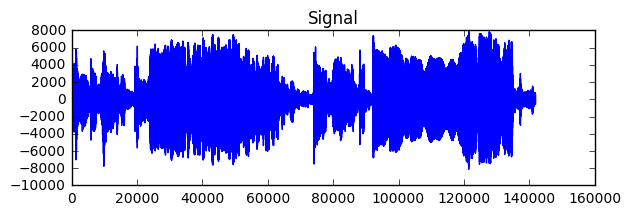

In [10]:
#fs,s = load_wav('../data/chime/clean/F01_050C0103_BTH.CH0.wav')
fs,s = load_wav('./deeprolling4000.wav')
plt.figure(figsize=(6.75,2))
plt.plot(s)
plt.title('Signal')
plt.show()

wavPlayer(s, fs)

In [15]:
f, t, Sxx = scipy.signal.spectrogram(s, fs=4000, nfft=1024)


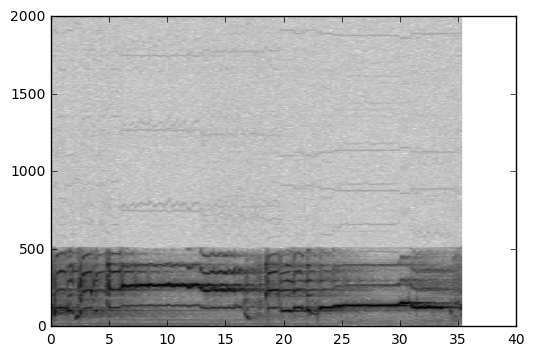

In [21]:
#import matplotlib.pyplot as plt
#plt.pcolormesh(t, f[:150], Sxx[:150],cmap='Set1')
#plt.pcolormesh(t, f[:150], Sxx[:150])
#Pxx0, freqs0, bins0, im0 = plt.specgram(s,NFFT=1024,Fs=16000,cmap=plt.cm.Oranges)
Pxx0, freqs0, bins0, im0 = plt.specgram(s,NFFT=1024,Fs=4000,cmap=plt.cm.Greys)
plt.show()

In [17]:
Sxx

array([[  1.36122147e+02,   1.47057114e+02,   2.67604446e+01, ...,
          9.66567695e-01,   4.27527390e+01,   3.04326363e+01],
       [  2.22850769e+02,   2.57010651e+02,   4.94186401e+01, ...,
          1.11187077e+00,   6.76988831e+01,   4.59076881e+01],
       [  1.21842323e+02,   1.66337463e+02,   3.68540649e+01, ...,
          4.20571709e+00,   3.04013577e+01,   1.63940048e+01],
       ..., 
       [  9.96491799e-05,   4.43611825e-05,   1.23154066e-04, ...,
          6.87390275e-05,   8.87044735e-06,   5.46570627e-05],
       [  5.94757039e-05,   1.24570852e-05,   2.15295295e-04, ...,
          4.69971710e-05,   1.25230745e-05,   6.47196939e-05],
       [  2.03476739e-05,   2.65481231e-06,   1.27535779e-04, ...,
          1.70179901e-05,   6.96260349e-06,   3.50215196e-05]], dtype=float32)

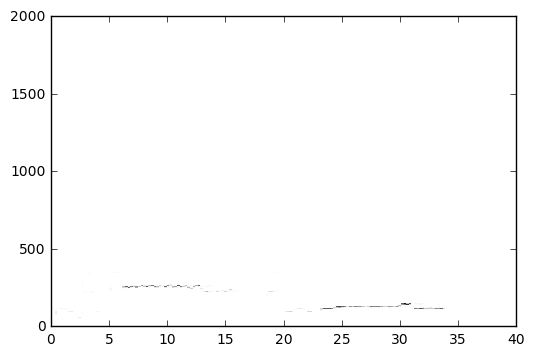

In [22]:
plt.pcolormesh(bins0, freqs0, Pxx0,cmap='Greys')

In [36]:
import matplotlib as mpl
import pylab as plb

In [41]:
def my_specgram(x, NFFT=256, Fs=2, Fc=0, detrend=mpl.mlab.detrend_none,
             window=mpl.mlab.window_tukey, noverlap=128,
             cmap=None, xextent=None, pad_to=None, sides='default',
             scale_by_freq=None, minfreq = None, maxfreq = None, **kwargs):
    """
    call signature::

      specgram(x, NFFT=256, Fs=2, Fc=0, detrend=mlab.detrend_none,
               window=mlab.window_hanning, noverlap=128,
               cmap=None, xextent=None, pad_to=None, sides='default',
               scale_by_freq=None, minfreq = None, maxfreq = None, **kwargs)

    Compute a spectrogram of data in *x*.  Data are split into
    *NFFT* length segments and the PSD of each section is
    computed.  The windowing function *window* is applied to each
    segment, and the amount of overlap of each segment is
    specified with *noverlap*.

    %(PSD)s

      *Fc*: integer
        The center frequency of *x* (defaults to 0), which offsets
        the y extents of the plot to reflect the frequency range used
        when a signal is acquired and then filtered and downsampled to
        baseband.

      *cmap*:
        A :class:`matplotlib.cm.Colormap` instance; if *None* use
        default determined by rc

      *xextent*:
        The image extent along the x-axis. xextent = (xmin,xmax)
        The default is (0,max(bins)), where bins is the return
        value from :func:`mlab.specgram`

      *minfreq, maxfreq*
        Limits y-axis. Both required

      *kwargs*:

        Additional kwargs are passed on to imshow which makes the
        specgram image

      Return value is (*Pxx*, *freqs*, *bins*, *im*):

      - *bins* are the time points the spectrogram is calculated over
      - *freqs* is an array of frequencies
      - *Pxx* is a len(times) x len(freqs) array of power
      - *im* is a :class:`matplotlib.image.AxesImage` instance

    Note: If *x* is real (i.e. non-complex), only the positive
    spectrum is shown.  If *x* is complex, both positive and
    negative parts of the spectrum are shown.  This can be
    overridden using the *sides* keyword argument.

    **Example:**

    .. plot:: mpl_examples/pylab_examples/specgram_demo.py

    """

    #####################################
    # modified  axes.specgram() to limit
    # the frequencies plotted
    #####################################

    # this will fail if there isn't a current axis in the global scope
    ax = plb.gca()
    Pxx, freqs, bins = mpl.mlab.specgram(x, NFFT, Fs, detrend,
         window, noverlap, pad_to, sides, scale_by_freq)

    # modified here
    #####################################
    if minfreq is not None and maxfreq is not None:
        Pxx = Pxx[(freqs >= minfreq) & (freqs <= maxfreq)]
        freqs = freqs[(freqs >= minfreq) & (freqs <= maxfreq)]
    #####################################

    Z = 10. * np.log10(Pxx)
    Z = np.flipud(Z)

    if xextent is None: xextent = 0, np.amax(bins)
    xmin, xmax = xextent
    freqs += Fc
    extent = xmin, xmax, freqs[0], freqs[-1]
    im = ax.imshow(Z, cmap, extent=extent, **kwargs)
    ax.axis('auto')

    return Pxx, freqs, bins, im

AttributeError: Unknown property fs

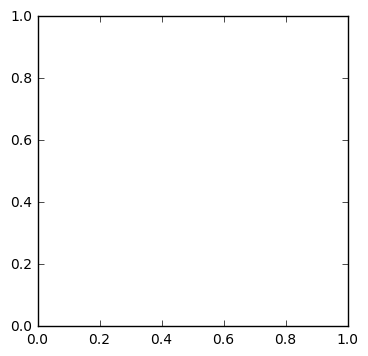

In [42]:
f2, t2, Sxx2 = my_specgram(s, fs=16000, NFFT=1024)
plt.pcolormesh(t2, f2[:150], Sxx2[:150],cmap='Set1')

In [9]:
import numpy as np
import scipy as sp

In [10]:
def kldiv():
    return 0

def klgradx(Y,A,X):
    ones = np.ones(Y.shape)
    return A.transpose().dot(ones - Y / (A.dot(X))) 

def klgrada(Y,A,X):
    ones = np.ones(Y.shape)
    return (ones - Y / (A.dot(X))).dot(X.transpose())

def klhessx(Y,A,X):
    K = Y.shape[1]
    R = A.shape[1]
    data = np.zeros(K * R ** 2)
    
    row_ind1 = np.tile(np.repeat(np.arange(R),R),K)
    #print row_ind1
    row_ind2 = np.repeat(np.arange(0,K*R,R), R ** 2)
    #print row_ind2
    row_ind = row_ind1 + row_ind2
    #print row_ind
    
    col_ind1 = np.tile(np.arange(R), (1,K*R))[0]
    #print col_ind1
    col_ind2 = np.repeat(np.arange(0,K*R,R), R ** 2)
    #print col_ind2
    col_ind = col_ind1 + col_ind2
    #print col_ind
    
    temp = Y / (A.dot(X)) ** 2
    for k in range(K):
        hkx = A.transpose().dot(np.diag(temp[:,k]).dot(A))
        hkx_row = np.reshape(hkx, (1,R ** 2))[0]
        data[k*R**2:(k+1)*R**2] = hkx_row.copy()
        
    return sp.sparse.csr_matrix((data, (row_ind, col_ind)), shape = [R*K, R*K])

def klhessa(Y,A,X):
    M = Y.shape[0]
    R = A.shape[1]
    data = np.zeros(M * R ** 2)
    
    row_ind1 = np.tile(np.repeat(np.arange(R),R),M)
    row_ind2 = np.repeat(np.arange(0,M*R,R), R ** 2)
    row_ind = row_ind1 + row_ind2
    
    col_ind1 = np.tile(np.arange(R), (1,M*R))[0]
    col_ind2 = np.repeat(np.arange(0,M*R,R), R ** 2)
    col_ind = col_ind1 + col_ind2
    
    #d = np.repeat(0.001,)
    temp = Y / (A.dot(X)) ** 2
    for m in range(M):
        hka = X.dot(np.diag(temp[m,:]).dot(X.transpose()))
        hka_row = np.reshape(hka, (1,R ** 2))[0]
        data[m*R ** 2:(m+1)*R ** 2] = hka_row.copy()
        
    return sp.sparse.csr_matrix((data, (row_ind, col_ind)), shape = [R*M, R*M])

In [51]:
def quasinewton(Y, R = 2, iters = 1):
    e = 0.00001
    M = Y.shape[0]
    K = Y.shape[1]
    np.random.seed(1)
    X = 5 + np.random.rand(R,K)
    A = 5 + np.random.rand(M,R)
    #X = np.ones((R,K))
    #A = np.ones((M,R))
    for it in range(iters):
        res = np.identity(R*K) * e
        hess = klhessx(Y,A,X).todense()
        inv_hess = sp.linalg.inv(hess+res)
        #inv_hess = sp.linalg.inv(hess)
        gr = np.reshape(klgradx(Y,A,X),(1,K*R))[0]
        diff = inv_hess.dot(gr)
        X_new = np.reshape(np.reshape(X,(1,R*K))[0] - diff, (R,K))
        #X = X - sp.linalg.inv(klhessx(Y,A,X).todense()+res).dot(klgradx(Y,A,X))
        (Xr,Xc) = X_new.nonzero()
        for i in Xr:
            for j in Xc:
                if X_new[i,j] <= 0:
                    X_new[i,j] = e
           
        res2 = np.identity(R*M) * e
        hess2 = klhessa(Y,A,X).todense()
        inv_hess2 = sp.linalg.inv(hess2+res2)
        #inv_hess2 = sp.linalg.inv(hess2)
        gr2 = np.reshape(klgrada(Y,A,X),(1,M*R))[0]
        diff2 = inv_hess2.dot(gr2)
        A_new = np.reshape(np.reshape(A,(1,R*M))[0] - diff2, (M,R))
        #A = A - sp.linalg.inv(klhessa(Y,A,X).todense()+res).dot(klgrada(Y,A,X))
        (Ar,Ac) = A_new.nonzero()
        for i in Ar:
            for j in Ac:
                if A_new[i,j] <= 0:
                    A_new[i,j] = e
                    
        X = X_new.copy()
        A = A_new.copy()
    return A,X

In [66]:
diag = np.arange(1,)
Y = np.diag(diag)

#Y = np.array([[0.5,0.4,0,0.1],[0.,0.4,0.4,0.2],[0.1,0.,0.6,0.3],[0.1,0.2,0.3,0.4]])
np.random.seed(3)
Y = 5 + np.random.rand(40,40)

print Y
A,X = quasinewton(Sxx_clean[0:80,0:80],R=40,iters=10)
#A,X = quasinewton(Y,R=20,iters=50)
print A
print X

[[ 5.5507979   5.70814782  5.29090474 ...,  5.55784076  5.36156476
   5.2250545 ]
 [ 5.40651992  5.46894025  5.26923558 ...,  5.19897603  5.151861
   5.10010434]
 [ 5.12929386  5.55327773  5.18781482 ...,  5.14333232  5.41412692
   5.04910892]
 ..., 
 [ 5.12891843  5.90036591  5.26278521 ...,  5.56962904  5.46921171
   5.0198345 ]
 [ 5.17422349  5.34384629  5.96272124 ...,  5.37374056  5.04173113
   5.28237498]
 [ 5.87524477  5.70052198  5.41892793 ...,  5.03264772  5.24595579
   5.43123394]]


LinAlgError: singular matrix

In [ ]:
print A.dot(X) - Sxx_clean[0:80,0:80]
print Sxx_clean.shape

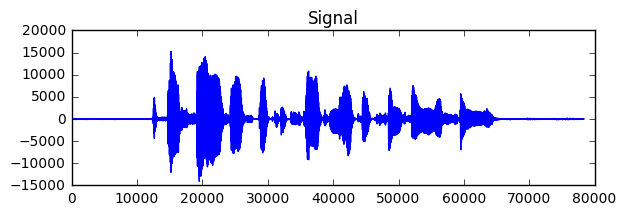

In [61]:
import numpy as np
import scipy 
#from nimfa.methods import factorization
#import nimfa
import scipy.sparse as sps

from wav import load_wav, wavPlayer

import matplotlib.pyplot as plt
%matplotlib inline


fs, s_clean = load_wav('../data/chime/clean/F01_22GC010A_BTH.CH1.wav')

plt.figure(figsize=(6.75,2))
plt.plot(s_clean)
plt.title('Signal')
plt.show()

wavPlayer(s_clean[5000:7000], fs)


f_clean, t_clean, Sxx_clean = scipy.signal.spectrogram(s_clean, fs=16000, nfft=1024)

In [136]:
A = np.array([[1,2],[3,4]])
B = np.array([[1,2],[3,4]])
print A * B
C = sp.sparse.csr_matrix((100,100),dtype='float32')
C[2,2] = 34
print C
print A.shape
d = np.array([[1,2,3,4],[5,6,7,8]])
print d.reshape((1,8))[0]
print np.tile(d,2)


(t1,t2)= A.nonzero()
print X

[[ 1  4]
 [ 9 16]]
  (2, 2)	34.0
(2, 2)
[1 2 3 4 5 6 7 8]
[[1 2 3 4 1 2 3 4]
 [5 6 7 8 5 6 7 8]]


NameError: name 'X' is not defined